In [20]:
import numpy as np
import matplotlib.pyplot as plt

import mne

import glob
import os

### Set up 

In [21]:
#-----------------------------
#           PARAMETERS
#-----------------------------
task = 'listen'
evoked_dir = f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_{task}/{task}_ERP_data'
epochs_dir = f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_{task}/{task}_epochs_data'

#period = 'post'
#subjects_to_process = ['05', '06', '07', '08']
subjects_to_process = [ '14']




#### TO DO: take equal subsets from each participant?

In [22]:
#-----------------------------
#           GROUPING EVOKEDS
#-----------------------------

evoked_list_pre = []
epochs_list_pre = []
evoked_list_post = []
epochs_list_post = []

#for file in sorted(os.listdir(evoked_dir)):

for subject in subjects_to_process:
    print('Processing subject: ', subject)
    """    file_evokeds = glob.glob(os.path.join(evoked_dir, f'listen_ERP_{period}_{subject}.fif'))[0]
    file_epochs = glob.glob(os.path.join(epochs_dir, f'listen_epochs_{period}_{subject}.fif'))[0]
    print('Processing subject: ', subject)
    evoked = mne.read_evokeds(file_evokeds)[0]
    evoked_list.append(evoked)
    epochs = mne.read_epochs(file_epochs)
    epochs_list.append(epochs)"""

    file_evokeds_pre = glob.glob(os.path.join(evoked_dir, f'{task}_ERP_pre_{subject}.fif'))[0]
    file_epochs_pre = glob.glob(os.path.join(epochs_dir, f'{task}_epochs_pre_{subject}.fif'))[0]
  
    evoked_pre = mne.read_evokeds(file_evokeds_pre)[0]
    evoked_list_pre.append(evoked_pre)
    epochs_pre = mne.read_epochs(file_epochs_pre)
    epochs_list_pre.append(epochs_pre)

    file_evokeds_post = glob.glob(os.path.join(evoked_dir, f'{task}_ERP_post_{subject}.fif'))[0]
    file_epochs_post = glob.glob(os.path.join(epochs_dir, f'{task}_epochs_post_{subject}.fif'))[0]
  
    evoked_post = mne.read_evokeds(file_evokeds_post)[0]
    evoked_list_post.append(evoked_post)
    epochs_post = mne.read_epochs(file_epochs_post)
    epochs_list_post.append(epochs_post)


concat_epochs_pre = mne.concatenate_epochs(epochs_list_pre)
concat_evoked_pre = mne.combine_evoked(evoked_list_pre, weights = 'equal')

concat_epochs_post = mne.concatenate_epochs(epochs_list_post)
concat_evoked_post = mne.combine_evoked(evoked_list_post, weights = 'equal')



Processing subject:  14
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_ERP_data/listen_ERP_pre_14.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 328 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_pre_14.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_ERP_data/listen_ERP_post_14.fif ...
    Found the data of interest:
        t =    -203.12 ...     50

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_81271/2261946079.py:25: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_ERP_data/listen_ERP_pre_14.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked_pre = mne.read_evokeds(file_evokeds_pre)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_81271/2261946079.py:27: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data/listen_epochs_pre_14.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_pre = mne.read_epochs(file_epochs_pre)
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_81271/2261946079.py:33: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_ERP_d

In [23]:
concat_epochs_pre.info['bads'] = ['Iz', 'P8']


In [24]:
concat_epochs_pre.info

<Info | 11 non-empty values
 bads: 2 items (Iz, P8)
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 64 EEG, 6 misc, 2 EOG
 custom_ref_applied: False
 dig: 67 items (3 Cardinal, 64 EEG)
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 72
 projs: []
 sfreq: 128.0 Hz
>

### Plot grand average

In [25]:
mne.viz.set_browser_backend('qt', verbose=None)


'qt'

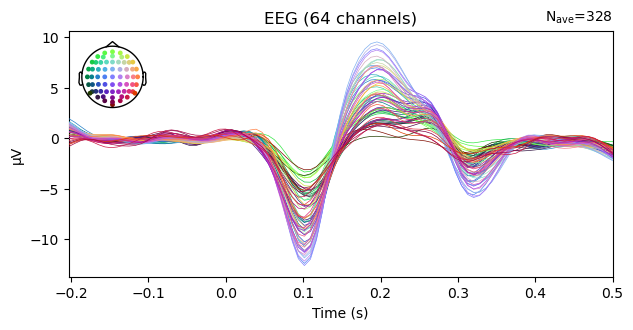

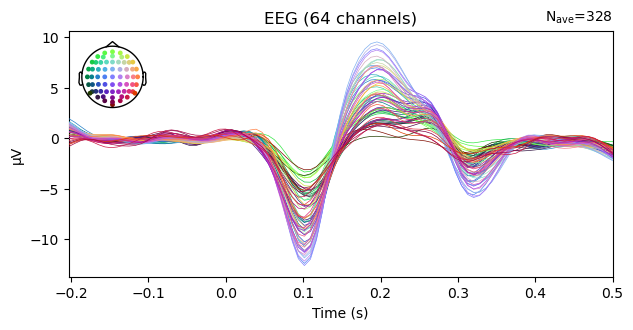

In [26]:
concat_evoked_pre.plot()

No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


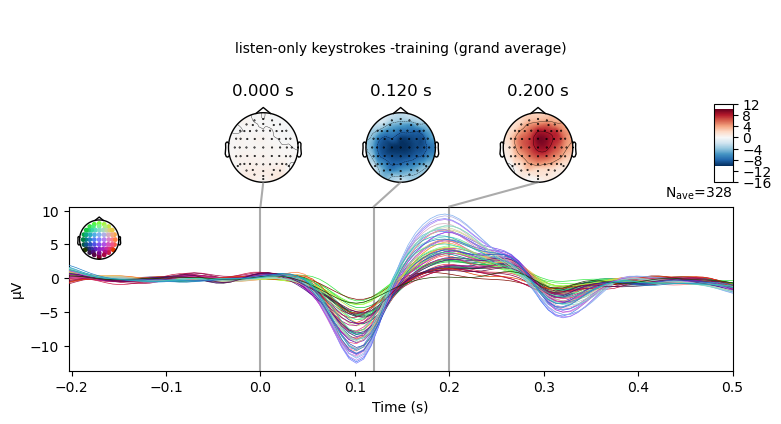

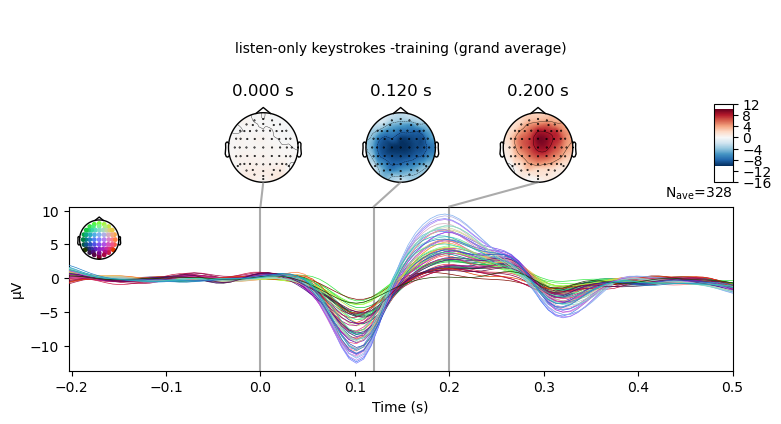

In [27]:
concat_evoked_pre.plot_joint(times =[ 0, 0.12, 0.2], title= f'{task}-only keystrokes -training (grand average)', picks = 'all')

No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


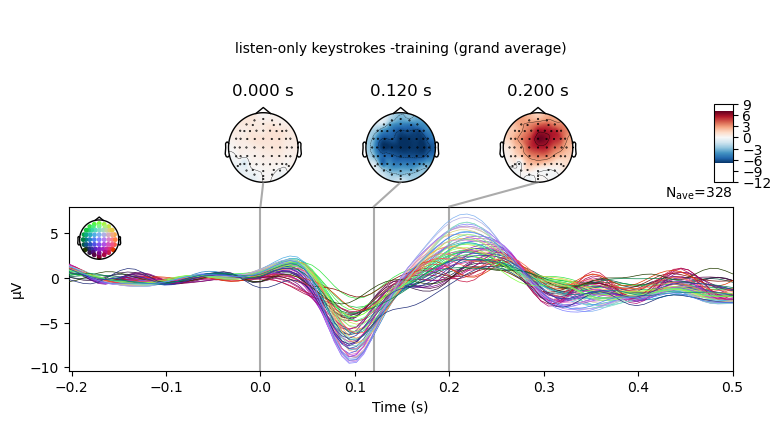

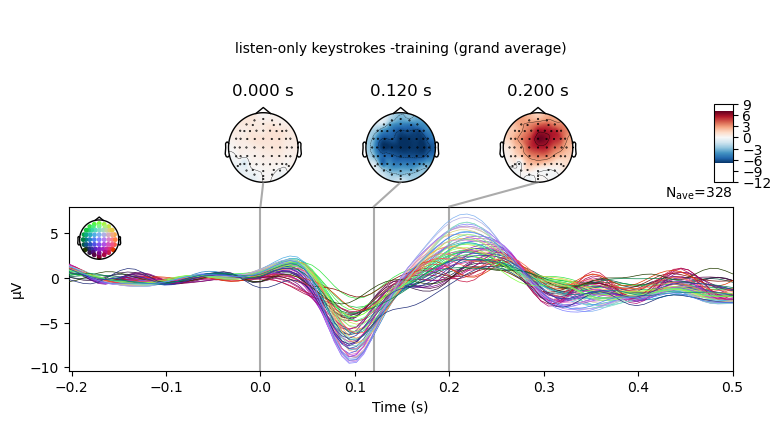

In [28]:
bad_ch = ['Cz']
concat_evoked_post.plot_joint(times =[ 0, 0.12, 0.2], title= f'{task}-only keystrokes -training (grand average)', picks = 'eeg')

combining channels using "mean"
combining channels using "mean"


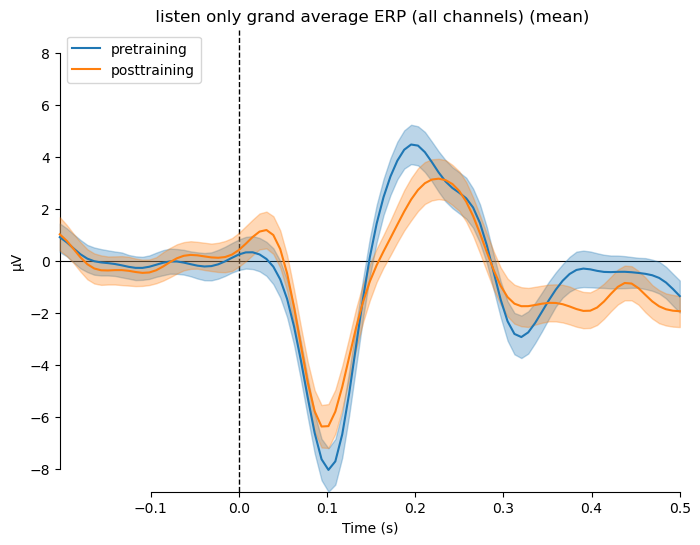

[<Figure size 800x600 with 1 Axes>]

In [29]:
ga = dict(
        pretraining=list(concat_epochs_pre.iter_evoked()),
        posttraining=list(concat_epochs_post.iter_evoked()))
mne.viz.plot_compare_evokeds(ga, title = f' {task} only grand average ERP (all channels)',combine = 'mean')

### Scrap code below

In [30]:
"""# Specify the channels of interest
channels_of_interest = ['Cz', 'Pz', 'FCz', 'AFz', 'Fz']  # replace with your desired channel names

# Pick the channels from the epochs
pretraining_epochs = concat_epochs_pre.pick_channels(channels_of_interest)
posttraining_epochs = concat_epochs_post.pick_channels(channels_of_interest)

# Create the grand average evokeds for pretraining and posttraining
ga = dict(
    pretraining=list(pretraining_epochs.iter_evoked()),
    posttraining=list(posttraining_epochs.iter_evoked())
)

# Plot the grand average ERP
mne.viz.plot_compare_evokeds(ga, title=f'{task} only average ERP', combine='mean')"""

"# Specify the channels of interest\nchannels_of_interest = ['Cz', 'Pz', 'FCz', 'AFz', 'Fz']  # replace with your desired channel names\n\n# Pick the channels from the epochs\npretraining_epochs = concat_epochs_pre.pick_channels(channels_of_interest)\nposttraining_epochs = concat_epochs_post.pick_channels(channels_of_interest)\n\n# Create the grand average evokeds for pretraining and posttraining\nga = dict(\n    pretraining=list(pretraining_epochs.iter_evoked()),\n    posttraining=list(posttraining_epochs.iter_evoked())\n)\n\n# Plot the grand average ERP\nmne.viz.plot_compare_evokeds(ga, title=f'{task} only average ERP', combine='mean')"